<a href="https://colab.research.google.com/github/books-by-chansung/ds-bookcamp/blob/main/notebooks/ds_bookcamp_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p /usr/share/fonts/truetype/nanum
!wget https://github.com/books-by-chansung/ds-bookcamp/blob/main/NanumBarunGothic.ttf?raw=true -O /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf

--2024-10-03 11:41:52--  https://github.com/books-by-chansung/ds-bookcamp/blob/main/NanumBarunGothic.ttf?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/books-by-chansung/ds-bookcamp/raw/refs/heads/main/NanumBarunGothic.ttf [following]
--2024-10-03 11:41:52--  https://github.com/books-by-chansung/ds-bookcamp/raw/refs/heads/main/NanumBarunGothic.ttf
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/refs/heads/main/NanumBarunGothic.ttf [following]
--2024-10-03 11:41:53--  https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/refs/heads/main/NanumBarunGothic.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.git

In [2]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

In [3]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

## 22-1

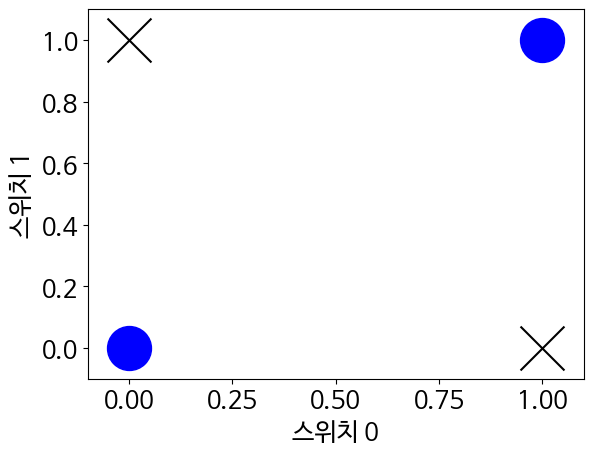

In [6]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y = (X[:,0] + X[:,1] == 1).astype(int)

for i in [0, 1]:
    plt.scatter(X[y == i][:,0], X[y == i][:,1], marker=['o', 'x'][i], color=['b', 'k'][i], s=1000)

plt.xlabel('스위치 0')
plt.ylabel('스위치 1')
plt.margins(0.1)
plt.show()

## 22-2

In [7]:
def classify(features):
    switch0, switch1 = features

    if switch0 == 0:
        if switch1 == 0:
            prediction = 0
        else:
            prediction = 1
    else:
        if switch1 == 0:
            prediction = 1
        else:
            prediction = 0
    return prediction

for i in range(X.shape[0]):
    assert classify(X[i]) == y[i]

## 22-3

In [8]:
np.random.seed(0)
y_simple = np.random.binomial(1, 0.5, size=10)
X_simple = np.array([[e] for e in y_simple])
print(f"특징: {X_simple}")
print(f"\n레이블: {y_simple}")

특징: [[1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]]

레이블: [1 1 1 1 0 1 0 1 1 0]


## 22-4

In [9]:
count = (X_simple[:,0][y_simple == 0] == 0).sum()
print(f"스위치와 전구가 모두 꺼진 경우는 {count}번입니다")

스위치와 전구가 모두 꺼진 경우는 3번입니다


## 22-5

In [10]:
count = (X_simple[:,0][y_simple == 1] == 1).sum()
print(f"스위치와 전구가 모두 켜진 경우는 {count}번입니다")

스위치와 전구가 모두 켜진 경우는 7번입니다


## 22-6

In [11]:
def get_co_occurrence(X, y, col=0):
    co_occurrence = []
    for i in [0, 1]:
        counts = [(X[:,col][y == i] == j).sum() for j in [0, 1]]
        co_occurrence.append(counts)
    return np.array(co_occurrence)

M = get_co_occurrence(X_simple, y_simple)
assert M[0][0] == 3
assert M[1][1] == 7
print(M)

[[3 0]
 [0 7]]


## 22-7

In [12]:
X_simple = np.vstack([X_simple, [1]])
y_simple = np.hstack([y_simple, [0]])
M = get_co_occurrence(X_simple, y_simple)
print(M)

[[3 1]
 [0 7]]


## 22-8

In [13]:
bulb_probs = M[0] / M[0].sum()
print("스위치가 0으로 설정되었을 때, 전구의 상태 확률은 다음과 같습니다")
print(bulb_probs)

prob_on, prob_off = bulb_probs
print(f"\n전구가 꺼져있을 가능성은 75% 입니다")
print(f"전구가 켜져있을 가능성은 25% 입니다")

스위치가 0으로 설정되었을 때, 전구의 상태 확률은 다음과 같습니다
[0.75 0.25]

전구가 꺼져있을 가능성은 75% 입니다
전구가 켜져있을 가능성은 25% 입니다


## 22-9

In [14]:
bulb_probs = M[1] / M[1].sum()
print("스위치가 1로 설정되었을 때, 전구의 상태 확률은 다음과 같습니다")
print(bulb_probs)

prediction = ['off', 'on'][bulb_probs.argmax()]
accuracy = bulb_probs.max()
print(f"\n전구는 {100 * accuracy:.0f}%의 정확도로 {prediction}일 것입니다")

스위치가 1로 설정되었을 때, 전구의 상태 확률은 다음과 같습니다
[0. 1.]

전구는 100%의 정확도로 on일 것입니다


## 22-10

In [15]:
for i, count in enumerate(M.sum(axis=1)):
    state = ['off', 'on'][i]
    print(f"스위치 상태({state})은 {count}번 관찰되었습니다")

스위치 상태(off)은 4번 관찰되었습니다
스위치 상태(on)은 7번 관찰되었습니다


## 22-11

In [16]:
accuracies = [0.75, 1.0]
total_accuracy = np.average(accuracies, weights=M.sum(axis=1))
print(f"총 정확도는 {100 * total_accuracy:.0f}%입니다")

총 정확도는 91%입니다


## 22-12

In [18]:
def train_if_else(X, y, feature_col=0, feature_name='feature'):
    M = get_co_occurrence(X, y, col=feature_col)
    probs0, probs1 = [M[i] / M[i].sum() for i in [0, 1]]

    if_else = f"""if {feature_name} == 0:
    prediction = {probs0.argmax()}
else:
    prediction = {probs1.argmax()}
    """.strip()

    if probs0.argmax() == probs1.argmax():
        if_else = f"prediction = {probs0.argmax()}"

    accuracies = [probs0.max(), probs1.max()]
    total_accuracy = np.average(accuracies, weights=M.sum(axis=1))
    return if_else, total_accuracy

if_else, accuracy = train_if_else(X_simple, y_simple, feature_name='switch')
print(if_else)
print(f"\n이 구문의 정확도는 {100 * accuracy:.0f}% 입니다")

if switch == 0:
    prediction = 0
else:
    prediction = 1

이 구문의 정확도는 91% 입니다


## 22-13

In [21]:
feature_names = [f"스위치{i}" for i in range(2)]
for i, name in enumerate(feature_names):
    _, accuracy = train_if_else(X, y, feature_col=i, feature_name=name)
    print(f"{name}에 대해 학습된 모델의 정확도는 {100 * accuracy:.0f}% 입니다")

스위치0에 대해 학습된 모델의 정확도는 50% 입니다
스위치1에 대해 학습된 모델의 정확도는 50% 입니다


## 22-14

In [22]:
is_off = X[:,0] == 0
X_switch0_off = X[is_off]
y_switch0_off = y[is_off]
print(f"switch0이 꺼졌을 때의 특징 배열\n{X_switch0_off}")
print(f"\nswitch0이 꺼졌을 때의 클래스 레이블\n{y_switch0_off}")

switch0이 꺼졌을 때의 특징 배열
[[0 0]
 [0 1]]

switch0이 꺼졌을 때의 클래스 레이블
[0 1]


## 22-15

In [23]:
X_switch0_off = np.delete(X_switch0_off, 0, axis=1)
print(X_switch0_off)

[[0]
 [1]]


## 22-16

In [25]:
results = train_if_else(X_switch0_off, y_switch0_off, feature_name='switch1')
switch0_off_model, off_accuracy = results
print("만약 스위치 0이 꺼져있다면, 다음의 if/else 모델의 정확도는 "
    f"{100 * off_accuracy:.0f}% 입니다.\n\n{switch0_off_model}")

만약 스위치 0이 꺼져있다면, 다음의 if/else 모델의 정확도는 100% 입니다.

if switch1 == 0:
    prediction = 0
else:
    prediction = 1


## 22-17

In [26]:
def filter_X_y(X, y, feature_col=0, condition=0):
    inclusion_criteria = X[:,feature_col] == condition
    y_filtered = y[inclusion_criteria]
    X_filtered = X[inclusion_criteria]
    X_filtered = np.delete(X_filtered, feature_col, axis=1)
    return X_filtered, y_filtered

X_switch0_on, y_switch0_on = filter_X_y(X, y, condition=1)

## 22-18

In [28]:
results = train_if_else(X_switch0_on, y_switch0_on, feature_name='switch1')
switch0_on_model, on_accuracy = results
print("만약 스위치 0이 꺼져있다면, 다음의 if/else 모델의 정확도는 "
    f"{100 * off_accuracy:.0f}% 입니다.\n\n{switch0_off_model}")

만약 스위치 0이 꺼져있다면, 다음의 if/else 모델의 정확도는 100% 입니다.

if switch1 == 0:
    prediction = 0
else:
    prediction = 1


## 22-19

In [29]:
def combine_if_else(if_else_a, if_else_b, feature_name='feature'):
    return f"""
if {feature_name} == 0:
{add_indent(if_else_a)}
else:
{add_indent(if_else_b)}
""".strip()

def add_indent(if_else):
    return '\n'.join([4 * ' ' + line for line in if_else.split('\n')])

nested_model = combine_if_else(switch0_off_model, switch0_on_model,
                              feature_name='switch0')
print(nested_model)

if switch0 == 0:
    if switch1 == 0:
        prediction = 0
    else:
        prediction = 1
else:
    if switch1 == 0:
        prediction = 1
    else:
        prediction = 0


## 22-20

In [30]:
accuracies = [off_accuracy, on_accuracy]
weights = [y_switch0_off.size, y_switch0_on.size]
total_accuracy = np.average(accuracies, weights=weights)
print(f"총 정확도는 {100 * total_accuracy:.0f}%입니다")

총 정확도는 100%입니다


## 22-21

In [32]:
def split(X, y, feature_col=0, condition=0):
    has_condition = X[:,feature_col] == condition
    X_a, y_a = [e[has_condition] for e in [X, y]]
    X_b, y_b = [e[~has_condition] for e in [X, y]]
    X_a, X_b = [np.delete(e, feature_col, axis=1) for e in [X_a, X_b]]
    return [X_a, X_b, y_a, y_b]

X_a, X_b, y_a, y_b = split(X, y)
assert np.array_equal(X_a, X_switch0_off)
assert np.array_equal(X_b, X_switch0_on)

## 22-22

In [33]:
def train_nested_if_else(X, y, split_col=0, feature_names=['feature1', 'feature1']):
    split_name = feature_names[split_col]
    simple_model, simple_accuracy = train_if_else(X, y, split_col, split_name)
    if simple_accuracy == 1.0:
        return (simple_model, simple_accuracy)

    X_a, X_b, y_a, y_b = split(X, y, feature_col=split_col)
    in_name = feature_names[1 - split_col]
    if_else_a, accuracy_a = train_if_else(X_a, y_a, feature_name=in_name)
    if_else_b, accuracy_b = train_if_else(X_b, y_b, feature_name=in_name)
    nested_model = combine_if_else(if_else_a, if_else_b, split_name)
    accuracies = [accuracy_a, accuracy_b]
    nested_accuracy = np.average(accuracies, weights=[y_a.size, y_b.size])
    if nested_accuracy > simple_accuracy:
        return (nested_model, nested_accuracy)

    return (simple_model, simple_accuracy)

feature_names = ['switch0', 'switch1']
model, accuracy = train_nested_if_else(X, y, feature_names=feature_names)
print(model)
print(f"\n이 구문의 정확도는 {100 * accuracy:.0f}% 입니다")

if switch0 == 0:
    if switch1 == 0:
        prediction = 0
    else:
        prediction = 1
else:
    if switch1 == 0:
        prediction = 1
    else:
        prediction = 0

이 구문의 정확도는 100% 입니다


## 22-23

In [34]:
model, accuracy = train_nested_if_else(X, y, split_col=1, feature_names=feature_names)
print(model)
print(f"\n이 구문의 정확도는 {100 * accuracy:.0f}% 입니다")

if switch1 == 0:
    if switch0 == 0:
        prediction = 0
    else:
        prediction = 1
else:
    if switch0 == 0:
        prediction = 1
    else:
        prediction = 0

이 구문의 정확도는 100% 입니다


## 22-24

In [35]:
np.random.seed(1)
y_rain = np.random.binomial(1, 0.6, size=100)
is_wet = [e if np.random.binomial(1, 0.95) else 1 - e for e in y_rain]
is_fall = [e if np.random.binomial(1, 0.6) else 1 - e for e in y_rain]
X_rain = np.array([is_fall, is_wet]).T

## 22-25

In [36]:
feature_names = ['is_autumn', 'is_wet']
model, accuracy = train_nested_if_else(X_rain, y_rain, feature_names=feature_names)
print(model)
print(f"\n이 구문의 정확도는 {100 * accuracy:.0f}% 입니다")

if is_autumn == 0:
    if is_wet == 0:
        prediction = 0
    else:
        prediction = 1
else:
    if is_wet == 0:
        prediction = 0
    else:
        prediction = 1

이 구문의 정확도는 95% 입니다


## 22-26

In [37]:
model, accuracy = train_nested_if_else(X_rain, y_rain, split_col=1,
                                   feature_names=feature_names)
print(model)
print(f"\n이 구문의 정확도는 {100 * accuracy:.0f}% 입니다")

if is_wet == 0:
    prediction = 0
else:
    prediction = 1

이 구문의 정확도는 95% 입니다


## 22-27

In [38]:
prob_rain = y_rain.sum() / y_rain.size
print(f"관측 중 {100 * prob_rain:.0f}%의 확률로 비가 옵니다")

관측 중 61%의 확률로 비가 옵니다


## 22-28

In [39]:
y_fall_a, y_fall_b = split(X_rain, y_rain, feature_col=0)[-2:]
for i, y_fall in enumerate([y_fall_a, y_fall_b]):
    prob_rain = y_fall.sum() / y_fall.size
    state = ['가을이 아님', '가을'][i]
    print(f"{state}일 때 비가 올 확률은 {100 * prob_rain:.0f}% 입니다")

가을이 아님일 때 비가 올 확률은 55% 입니다
가을일 때 비가 올 확률은 66% 입니다


## 22-29

In [40]:
y_wet_a, y_wet_b = split(X_rain, y_rain, feature_col=1)[-2:]
for i, y_wet in enumerate([y_wet_a, y_wet_b]):
    prob_rain = y_wet.sum() / y_wet.size
    state = ['젖음이 아님', '젖음'][i]
    print(f"{state}일 때 비가 올 확률은 {100 * prob_rain:.0f}% 입니다")

젖음이 아님일 때 비가 올 확률은 10% 입니다
젖음일 때 비가 올 확률은 98% 입니다


## 22-30

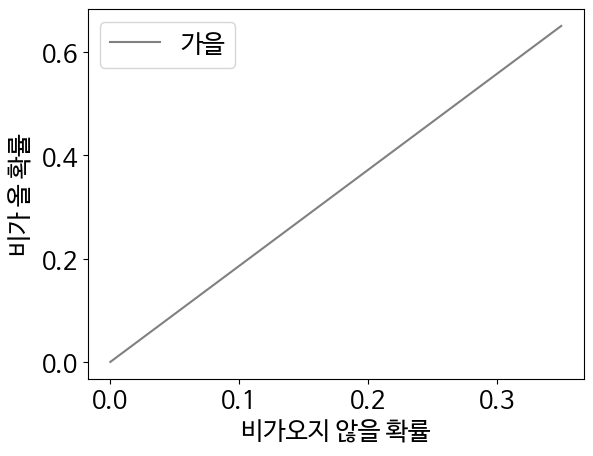

In [42]:
import matplotlib.pyplot as plt

# x축 데이터 (비가 오지 않을 확률)
x = [0, 0.35]

# y축 데이터 (비가 올 확률)
y = [0, 0.65]

# 그래프 그리기
plt.plot(x, y, color='gray', label='가을')

# 축 라벨 설정
plt.xlabel('비가오지 않을 확률')
plt.ylabel('비가 올 확률')

# 범례 표시
plt.legend()

# 그래프 보이기
plt.show()

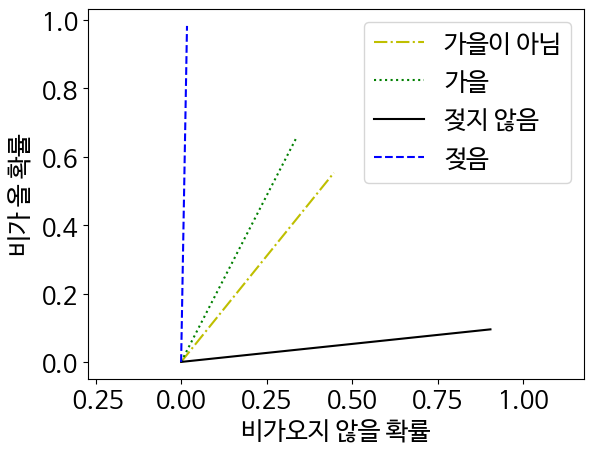

In [41]:
def get_class_distribution(y):
    prob_rain = y.sum() / y.size
    return np.array([1 - prob_rain, prob_rain])

def plot_vector(v, label, linestyle='-', color='b'):
    plt.plot([0, v[0]], [0, v[1]], label=label, linestyle=linestyle, c=color)

classes = [y_fall_a, y_fall_b, y_wet_a, y_wet_b]
distributions = [get_class_distribution(y) for y in classes]
labels = ['가을이 아님', '가을', '젖지 않음', '젖음']
colors = ['y', 'g', 'k', 'b']
linestyles = ['-.', ':', '-', '--']
for tup in zip(distributions, labels, colors, linestyles):
    vector, label, color, linestyle = tup
    plot_vector(vector, label, linestyle=linestyle, color=color)

plt.legend()
plt.xlabel('비가오지 않을 확률')
plt.ylabel('비가 올 확률')
plt.axis('equal')
plt.show()

## 22-31

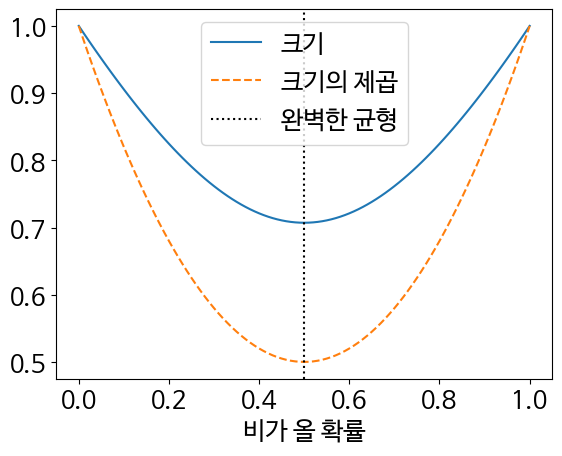

In [43]:
prob_rain = np.arange(0, 1.001, 0.01)
vectors = [np.array([1 - p, p]) for p in prob_rain]
magnitudes = [np.linalg.norm(v) for v in vectors]
square_magnitudes = [v @ v for v in vectors]
plt.plot(prob_rain, magnitudes, label='크기')
plt.plot(prob_rain, square_magnitudes, label='크기의 제곱', linestyle='--')
plt.xlabel('비가 올 확률')
plt.axvline(0.5, color='k', label='완벽한 균형', linestyle=':')
plt.legend()
plt.show()

## 22-32

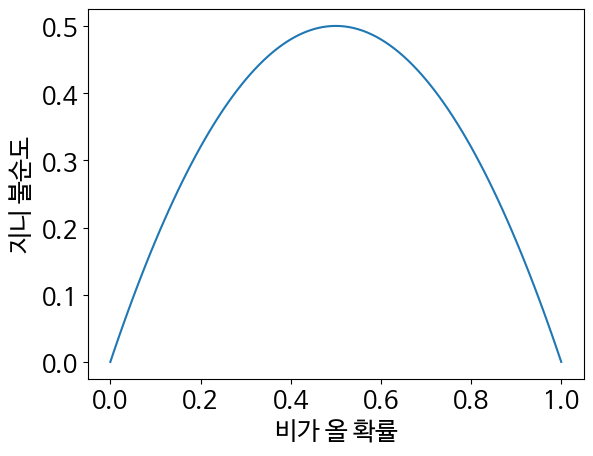

In [44]:
gini_impurities = [1 - (v @ v) for v in vectors]
plt.plot(prob_rain, gini_impurities)
plt.xlabel('비가 올 확률')
plt.ylabel('지니 불순도')
plt.show()

## 22-33

In [46]:
def compute_impurity(y_a, y_b):
    v_a = get_class_distribution(y_a)
    v_b = get_class_distribution(y_b)
    impurities = [1 - v @ v for v in [v_a, v_b]]
    weights = [len(y), len(y_b)]
    return np.average(impurities, weights=weights)

fall_impurity = compute_impurity(y_fall_a, y_fall_b)
wet_impurity = compute_impurity(y_wet_a, y_wet_b)
print(f"가을로 분할하는 경우, 불순도는 {fall_impurity:0.2f} 입니다")
print(f"젖음으로 분할하는 경우, 불순도는 {wet_impurity:0.2f} 입니다")


가을로 분할하는 경우, 불순도는 0.45 입니다
젖음으로 분할하는 경우, 불순도는 0.04 입니다


## 22-34

In [47]:
def sort_feature_indices(X, y):
    feature_indices = range(X.shape[1])
    impurities = []

    for i in feature_indices:
        y_a, y_b = split(X, y, feature_col=i)[-2:]
        impurities.append(compute_impurity(y_a, y_b))

    return sorted(feature_indices, key=lambda i: impurities[i])

indices = sort_feature_indices(X_rain, y_rain)
top_feature = feature_names[indices[0]]
print(f"불순도가 가장 낮은 특징: '{top_feature}'")

불순도가 가장 낮은 특징: 'is_wet'


## 22-35

In [48]:
np.random.seed(0)
def simulate_weather():
    is_fall = np.random.binomial(1, 0.25)
    is_cloudy = np.random.binomial(1, [0.3, 0.7][is_fall])
    rained_today = np.random.binomial(1, [0.05, 0.4][is_cloudy])
    if rained_today:
        rains_tomorrow = np.random.binomial(1, 0.5)
    else:
        rains_tomorrow = np.random.binomial(1, [0.05, 0.15][is_fall])

    features = [rained_today, is_cloudy, is_fall]
    return features, rains_tomorrow

X_rain, y_rain = [], []
for _ in range(1000):
    features, rains_tomorrow = simulate_weather()
    X_rain.append(features)
    y_rain.append(rains_tomorrow)

X_rain, y_rain = np.array(X_rain), np.array(y_rain)

## 22-36

In [49]:
feature_names = ['rained_today', 'is_cloudy', 'is_fall']
indices = sort_feature_indices(X_rain, y_rain)
print(f"지니 불순도에 따라 정렬된 특징들")
print([feature_names[i] for i in indices])

지니 불순도에 따라 정렬된 특징들
['is_fall', 'is_cloudy', 'rained_today']


## 22-37

In [50]:
skip_index = indices[-1]
X_subset = np.delete(X_rain, skip_index, axis=1)
name_subset = np.delete(feature_names, skip_index)
split_col = indices[0] if indices[0] < skip_index else indices[0] - 1
model, accuracy = train_nested_if_else(X_subset, y_rain,
                                   split_col=split_col,
                                   feature_names=name_subset)
print(model)
print(f"\n이 구문의 정확도는 {100 * accuracy:.0f}% 입니다")

prediction = 0

이 구문의 정확도는 74% 입니다


## 22-38

In [51]:
X_a, X_b, y_a, y_b = split(X_rain, y_rain, feature_col=indices[0])

## 22-39

In [52]:
name_subset = np.delete(feature_names, indices[0])
split_col = sort_feature_indices(X_a, y_a)[0]
model_a, accuracy_a = train_nested_if_else(X_a, y_a,
                                       split_col=split_col,
                                       feature_names=name_subset)
print("가을이 아닌 경우, 중첩된 모델의 정확도는 "
     f"{100 * accuracy_a:.0f}% 입니다\n\n{model_a}")

가을이 아닌 경우, 중첩된 모델의 정확도는 88% 입니다

if is_cloudy == 0:
    prediction = 0
else:
    if rained_today == 0:
        prediction = 0
    else:
        prediction = 1


## 22-40

In [53]:
split_col = sort_feature_indices(X_b, y_b)[0]
model_b, accuracy_b = train_nested_if_else(X_b, y_b,
                                       split_col=split_col,
                                       feature_names=name_subset)
print("가을인 경우, 중첩된 모델의 정확도는 "
     f"{100 * accuracy_a:.0f}% 입니다\n\n{model_a}")

가을인 경우, 중첩된 모델의 정확도는 88% 입니다

if is_cloudy == 0:
    prediction = 0
else:
    if rained_today == 0:
        prediction = 0
    else:
        prediction = 1


## 22-41

In [54]:
nested_model = combine_if_else(model_a, model_b, feature_names[indices[0]])
print(nested_model)
accuracies = [accuracy_a, accuracy_b]
accuracy = np.average(accuracies, weights=[y_a.size, y_b.size])
print(f"\n이 구분의 정확도는 {100 * accuracy:.0f}% 입니다")

if is_fall == 0:
    if is_cloudy == 0:
        prediction = 0
    else:
        if rained_today == 0:
            prediction = 0
        else:
            prediction = 1
else:
    if is_cloudy == 0:
        prediction = 0
    else:
        if rained_today == 0:
            prediction = 0
        else:
            prediction = 1

이 구분의 정확도는 85% 입니다


## 22-42

In [55]:
def train(X, y, feature_names):
    if X.shape[1] == 1:
        return train_if_else(X, y, feature_name=feature_names[0])

    indices = sort_feature_indices(X, y)
    X_subset = np.delete(X, indices[-1], axis=1)
    name_subset = np.delete(feature_names, indices[-1])
    simple_model, simple_accuracy = train(X_subset, y, name_subset)
    if simple_accuracy == 1.0:
        return (simple_model, simple_accuracy)

    split_col = indices[0]
    name_subset = np.delete(feature_names, split_col)
    X_a, X_b, y_a, y_b = split(X, y, feature_col=split_col)
    model_a, accuracy_a = train(X_a, y_a, name_subset)
    model_b, accuracy_b = train(X_b, y_b, name_subset)
    accuracies = [accuracy_a, accuracy_b]
    total_accuracy = np.average(accuracies, weights=[y_a.size, y_b.size])
    nested_model = combine_if_else(model_a, model_b, feature_names[split_col])
    if total_accuracy > simple_accuracy:
        return (nested_model, total_accuracy)

    return (simple_model, simple_accuracy)

model, accuracy = train(X_rain, y_rain, feature_names)
print(model)
print(f"\n이 구문의 정확도는 {100 * accuracy:.0f}% 입니다")

if is_fall == 0:
    if is_cloudy == 0:
        prediction = 0
    else:
        if rained_today == 0:
            prediction = 0
        else:
            prediction = 1
else:
    if is_cloudy == 0:
        prediction = 0
    else:
        if rained_today == 0:
            prediction = 0
        else:
            prediction = 1

이 구문의 정확도는 85% 입니다


## 22-43

In [56]:
from sklearn.tree import DecisionTreeClassifier

## 22-44

In [69]:
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y = (X[:,0] + X[:,1] == 1).astype(int)

clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

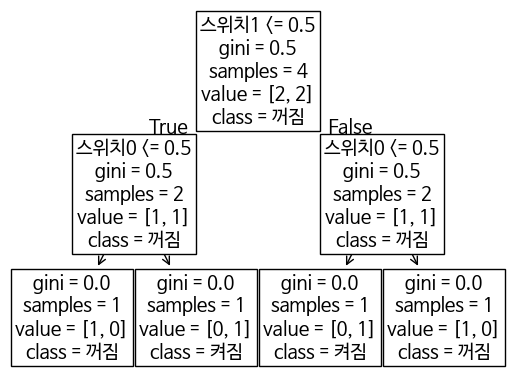

In [71]:
from sklearn.tree import plot_tree
feature_names = ['스위치0', '스위치1']
class_names = ['꺼짐', '켜짐']
plot_tree(clf, feature_names=feature_names, class_names=class_names)
plt.show()

## 22-46

In [72]:
from sklearn.tree import export_text
text_tree = export_text(clf, feature_names=feature_names)
print(text_tree)

|--- 스위치1 <= 0.50
|   |--- 스위치0 <= 0.50
|   |   |--- class: 0
|   |--- 스위치0 >  0.50
|   |   |--- class: 1
|--- 스위치1 >  0.50
|   |--- 스위치0 <= 0.50
|   |   |--- class: 1
|   |--- 스위치0 >  0.50
|   |   |--- class: 0



## 22-47

불순도는 임계값이 0.70일 때 최소화됩니다


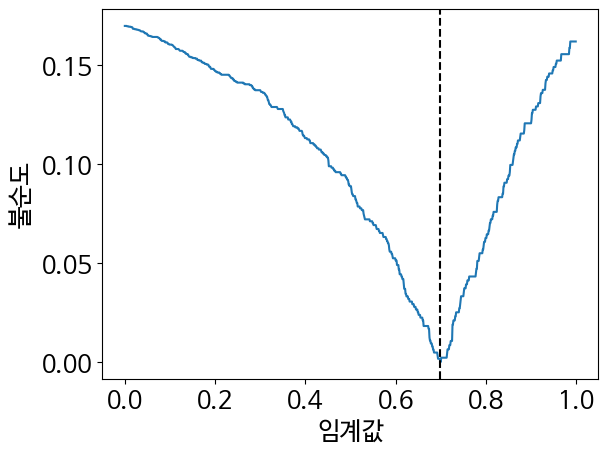

In [73]:
np.random.seed(1)
feature = np.random.normal(size=1000)
y = (feature >= 0.7).astype(int)
thresholds = np.arange(0.0, 1, 0.001)
gini_impurities = []
for thresh in thresholds:
    y_a = y[feature <= thresh]
    y_b = y[feature >= thresh]
    impurity = compute_impurity(y_a, y_b)
    gini_impurities.append(impurity)

best_thresh = thresholds[np.argmin(gini_impurities)]
print(f"불순도는 임계값이 {best_thresh:.02f}일 때 최소화됩니다")
plt.plot(thresholds, gini_impurities)
plt.axvline(best_thresh, c='k', linestyle='--')
plt.xlabel('임계값')
plt.ylabel('불순도')
plt.show()

## 22-48

In [74]:
np.random.seed(0)
from sklearn.datasets import load_wine
X, y = load_wine(return_X_y=True)
clf.fit(X, y)
feature_names = load_wine().feature_names
text_tree = export_text(clf, feature_names=feature_names)
print(text_tree)

|--- proline <= 755.00
|   |--- od280/od315_of_diluted_wines <= 2.11
|   |   |--- hue <= 0.94
|   |   |   |--- flavanoids <= 1.58
|   |   |   |   |--- class: 2
|   |   |   |--- flavanoids >  1.58
|   |   |   |   |--- class: 1
|   |   |--- hue >  0.94
|   |   |   |--- color_intensity <= 5.82
|   |   |   |   |--- class: 1
|   |   |   |--- color_intensity >  5.82
|   |   |   |   |--- class: 2
|   |--- od280/od315_of_diluted_wines >  2.11
|   |   |--- flavanoids <= 0.80
|   |   |   |--- class: 2
|   |   |--- flavanoids >  0.80
|   |   |   |--- alcohol <= 13.17
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  13.17
|   |   |   |   |--- color_intensity <= 4.06
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- color_intensity >  4.06
|   |   |   |   |   |--- class: 0
|--- proline >  755.00
|   |--- flavanoids <= 2.17
|   |   |--- malic_acid <= 2.08
|   |   |   |--- class: 1
|   |   |--- malic_acid >  2.08
|   |   |   |--- class: 2
|   |--- flavanoids >  2.17
|   |   |--- magnesi

## 22-49

In [76]:
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X, y)
text_tree = export_text(clf, feature_names=feature_names)
print(text_tree)

|--- proline <= 755.00
|   |--- od280/od315_of_diluted_wines <= 2.11
|   |   |--- class: 2
|   |--- od280/od315_of_diluted_wines >  2.11
|   |   |--- class: 1
|--- proline >  755.00
|   |--- flavanoids <= 2.17
|   |   |--- class: 2
|   |--- flavanoids >  2.17
|   |   |--- class: 0



## 22-50

In [77]:
print(clf.feature_importances_)

[0.         0.         0.         0.         0.         0.
 0.117799   0.         0.         0.         0.         0.39637021
 0.48583079]


## 22-51

In [78]:
for i in np.argsort(clf.feature_importances_)[::-1]:
    feature = feature_names[i]
    importance = clf.feature_importances_[i]
    if importance == 0:
        break

    print(f"'{feature}' 특징의 중요도는 {importance:0.2f} 입니다")

'proline' 특징의 중요도는 0.49 입니다
'od280/od315_of_diluted_wines' 특징의 중요도는 0.40 입니다
'flavanoids' 특징의 중요도는 0.12 입니다


## 22-52

In [79]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
feature_names = data.feature_names
num_features = len(feature_names)
num_classes = len(data.target_names)
print(f"암세포 데이터셋은 다음에 나열된 {num_classes}개의 클래스를 포함합니다")
print(data.target_names)
print(f"\n그리고 다음에 나열된 {num_features}개의 특징을 가집니다")
print(feature_names)

암세포 데이터셋은 다음에 나열된 2개의 클래스를 포함합니다
['malignant' 'benign']

그리고 다음에 나열된 30개의 특징을 가집니다
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## 22-53

In [80]:
X, y = load_breast_cancer(return_X_y=True)
clf = DecisionTreeClassifier()
clf.fit(X, y)
for i in np.argsort(clf.feature_importances_)[::-1]:
    feature = feature_names[i]
    importance = clf.feature_importances_[i]
    if round(importance, 2) == 0:
        break
    print(f"'특징 {feature}'의 중요도 점수는 {importance:0.2f} 입니다")

'특징 worst radius'의 중요도 점수는 0.70 입니다
'특징 worst concave points'의 중요도 점수는 0.11 입니다
'특징 worst texture'의 중요도 점수는 0.08 입니다
'특징 compactness error'의 중요도 점수는 0.03 입니다
'특징 mean texture'의 중요도 점수는 0.01 입니다
'특징 worst area'의 중요도 점수는 0.01 입니다
'특징 mean concave points'의 중요도 점수는 0.01 입니다
'특징 worst concavity'의 중요도 점수는 0.01 입니다
'특징 worst smoothness'의 중요도 점수는 0.01 입니다
'특징 symmetry error'의 중요도 점수는 0.01 입니다
'특징 mean smoothness'의 중요도 점수는 0.01 입니다
'특징 mean symmetry'의 중요도 점수는 0.01 입니다
'특징 mean compactness'의 중요도 점수는 0.01 입니다
'특징 worst perimeter'의 중요도 점수는 0.01 입니다


## 22-54

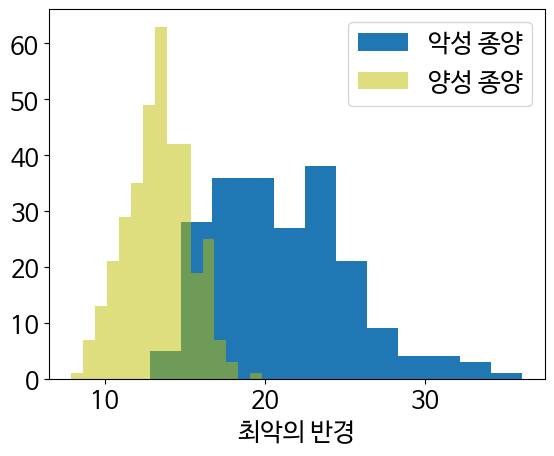

In [81]:
index = clf.feature_importances_.argmax()
plt.hist(X[y == 0][:, index], label='악성 종양', bins='auto')
plt.hist(X[y == 1][:, index], label='양성 종양', color='y', bins='auto', alpha=0.5)
plt.xlabel('최악의 반경')
plt.legend()
plt.show()

## 22-55

In [83]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(clf.predict(X), y)
print(f"우리의 분류 모델은 {100 * accuracy:.0f}%의 정확도로 학습용 데이터를 암기했습니다")

우리의 분류 모델은 100%의 정확도로 학습용 데이터를 암기했습니다


## 22-56

In [84]:
np.random.seed(0)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, )
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
accuracy = accuracy_score(clf.predict(X_test), y_test)
print(f"모델은 검증용 데이터셋에 대해 {100 * accuracy:.0f}%의 정확도를 가집니다")

모델은 검증용 데이터셋에 대해 90%의 정확도를 가집니다


## 22-57

In [85]:
forest = [DecisionTreeClassifier() for _ in range(100)]

## 22-58

In [86]:
np.random.seed(1)
def bootstrap(X, y):
    num_rows = X.shape[0]
    indices = np.random.choice(range(num_rows), size=num_rows, replace=True)
    X_new, y_new = X[indices], y[indices]
    return X_new, y_new

X_train_new, y_train_new = bootstrap(X_train, y_train)
assert X_train.shape == X_train_new.shape
assert y_train.size == y_train_new.size
assert not np.array_equal(X_train, X_train_new)
assert not np.array_equal(y_train, y_train_new)

## 22-59

In [87]:
np.random.seed(1)
features_train, classes_train = [], []
for _ in range(100):
    X_train_new, y_train_new = bootstrap(X_train, y_train)
    features_train.append(X_train_new)
    classes_train.append(y_train_new)

## 22-60

In [88]:
np.random.seed(1)
sample_size = int(X.shape[1] ** 0.5)
assert sample_size == 5
feature_indices = [np.random.choice(range(30), 5, replace=False) for _ in range(100)]
for i, index_subset in enumerate(feature_indices):
    features_train[i] = features_train[i][:, index_subset]

for index in [0, 99]:
    index_subset = feature_indices[index]
    names = feature_names[index_subset]
    print(f"\n{index} 번째 트리에 의해 활용되는 임의의 특징들은 다음과 같습니다")
    print(names)


0 번째 트리에 의해 활용되는 임의의 특징들은 다음과 같습니다
['concave points error' 'worst texture' 'radius error'
 'fractal dimension error' 'smoothness error']

99 번째 트리에 의해 활용되는 임의의 특징들은 다음과 같습니다
['mean smoothness' 'worst radius' 'fractal dimension error'
 'worst concave points' 'mean concavity']


## 22-61

In [89]:
for i, clf_tree in enumerate(forest):
    clf_tree.fit(features_train[i], classes_train[i])

## 22-62

In [90]:
from collections import Counter
feature_vector = X_test[0]
votes = []
for i, clf_tree in enumerate(forest):
    index_subset = feature_indices[i]
    vector_subset = feature_vector[index_subset]
    prediction = clf_tree.predict([vector_subset])[0]
    votes.append(prediction)

class_to_votes = Counter(votes)
for class_label, votes in class_to_votes.items():
    print(f"클래스 {class_label}에 대한 투표가 {votes}개로 집계되었습니다")

top_class = max(class_to_votes.items(), key=lambda x: x[1])[0]
print(f"\n가장 많은 투표를 받은 클래스는 {top_class} 입니다")

클래스 0에 대한 투표가 93개로 집계되었습니다
클래스 1에 대한 투표가 7개로 집계되었습니다

가장 많은 투표를 받은 클래스는 0 입니다


## 22-63

In [91]:
true_label = y_test[0]
print(f"해당 데이터의 실제 클래스는 {true_label} 입니다")

해당 데이터의 실제 클래스는 0 입니다


## 22-64

In [92]:
predictions = []
for i, clf_tree in enumerate(forest):
    index_subset = feature_indices[i]
    prediction = clf_tree.predict(X_test[:,index_subset])
    predictions.append(prediction)

predictions = np.array(predictions)
y_pred = [Counter(predictions[:,i]).most_common()[0][0] for i in range(y_test.size)]
accuracy = accuracy_score(y_pred, y_test)
print("검증용 데이터셋에 대한 랜덤포레스트의 정확도는 "
     f"{100 * accuracy:.0f}% 입니다")

검증용 데이터셋에 대한 랜덤포레스트의 정확도는 96% 입니다


## 22-65

In [93]:
np.random.seed(1)
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier()
clf_forest.fit(X_train, y_train)
y_pred = clf_forest.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print("검증용 데이터셋에 대한 랜덤포레스트 모델의 정확도는 "
     f"{100 * accuracy:.0f}% 입니다")

검증용 데이터셋에 대한 랜덤포레스트 모델의 정확도는 97% 입니다


## 22-66

In [94]:
np.random.seed(1)
clf_forest = RandomForestClassifier(n_estimators=10)
clf_forest.fit(X_train, y_train)
y_pred = clf_forest.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print("검증용 데이터셋에 대한 10개의 트리로 구성된 랜덤포레스트 모델의 정확도는 "
     f"{100 * accuracy:.0f}% 입니다")

검증용 데이터셋에 대한 10개의 트리로 구성된 랜덤포레스트 모델의 정확도는 97% 입니다


## 22-67

In [95]:
for i in np.argsort(clf_forest.feature_importances_)[::-1][:3]:
    feature = feature_names[i]
    importance = clf_forest.feature_importances_[i]
    print(f"특징 '{feature}'의 중요도 점수는 {importance:0.2f} 입니다")

특징 'worst perimeter'의 중요도 점수는 0.20 입니다
특징 'worst radius'의 중요도 점수는 0.16 입니다
특징 'worst area'의 중요도 점수는 0.16 입니다
